
<img src="images/utfsm.png" alt="" width="200px" align="right"/>

<br/>

# Taller de Manejo y Visualización de Datos con Python
### Grouping & Apply <br/>

Felipe González P.<br/>
felipe.gonzalezp.12@sansano.usm.cl<br/>

*Agradecimientos a : https://github.com/justmarkham* 






# Dataframe

Es una estructura de datos bidimensional (lo datos se alinean de forma tabular en filas y columnas).

**Ventajas:**
* Las columnas pueden ser de distinto tipo.
* El tamaño puede ser mutable.
* Se pueden acceder a columnas y filas específicas.
* Se pueden realizar operaciones sobre filas y columnas


<img src="https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg">

Un Dataframe puede ser creado a través de los siguientes input:
* List
* Dict
* Series
* Numpy ndarrays
* A partir de otro dataframe

<h1 align="center">GroupBy</h1>

### Introducción:

GroupBy puede ser resumido en un Dividir-Aplicar-Combinar (*Split-Apply-Combine*)




<div align="center"><img src="https://i.imgur.com/yjNkiwL.png?1"></div>


<div align="center"> <img src="https://www.safaribooksonline.com/library/view/learning-pandas/9781783985128/graphics/5128OS_09_01.jpg"></img></div>

# Patrón: Split - Apply - Combine

* Un dataset es dividido en pequeñas partes
* Cada una de esas piezas es operada/analizada independientemente
* Todos los resultados son combinados al final. 

*Este patrón es similar a  MapReduce (modelo de programación para dar soporte a la computación paralela sobre grandes colecciones de datos en grupos de computadoras y al commodity computing.) *

<h1 align="center"> Consumo de alcohol por continente </h1>

### Importar Librería necesaria

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

### Descargar dataset desde [url](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Guardar datos en una variable

In [2]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()  #asume n igual a 5 en caso de no agregar un valor

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### ¿Qué continente bebe más cerveza en promedio? ¿Cuál bebe menos?

In [8]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

###  Imprimir las estadísticas de consumo de vino por cada continente

In [9]:
drinks.groupby('continent').wine_servings.describe()


,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


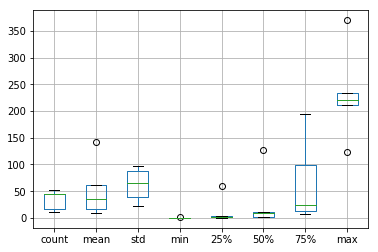

In [10]:
drinks.groupby('continent').wine_servings.describe().boxplot()


### ¿Cuál es el promedio de consumo por cada columna en cada continente?

In [11]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### ¿Cuál es la mediana de consumo por cada columna en cada continente?


In [12]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Imprimir el promedio, mínimo y máximo con respecto al consumo de *spirit* agrupado por continente

In [13]:
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max']) #llama a la funcion mean, min, max


,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


<h1 align="center">Apply</h1>

<h1 align="center"> Consumo de alcohol en estudiantes </h1>

### Los datos necesarios están aqui: [url](https://github.com/guipsamora/pandas_exercises/blob/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv).

### Lo guardaremos como siempre en una variable

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv', sep = ',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### ¡Son muchas columnas! Solo queremos las que están dentro del rango [school,guardian]

In [15]:
stud_alcoh = df.loc[: , "school":"guardian"] # es para seleccionar. df.loc[row_indexer,column_indexer]
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


### Creemos una función que ponga en mayúscula ciertas palabras

In [16]:
captalizer = lambda x: x.upper()

### Pongamos en mayúsculas Mjob y Fjob

In [17]:
stud_alcoh['Mjob'].apply(captalizer)
stud_alcoh['Fjob'].apply(captalizer)

0       TEACHER
1         OTHER
2         OTHER
3      SERVICES
4         OTHER
5         OTHER
6         OTHER
7       TEACHER
8         OTHER
9         OTHER
10       HEALTH
11        OTHER
12     SERVICES
13        OTHER
14        OTHER
15        OTHER
16     SERVICES
17        OTHER
18     SERVICES
19        OTHER
20        OTHER
21       HEALTH
22        OTHER
23        OTHER
24       HEALTH
25     SERVICES
26        OTHER
27     SERVICES
28        OTHER
29      TEACHER
         ...   
365       OTHER
366    SERVICES
367    SERVICES
368    SERVICES
369     TEACHER
370    SERVICES
371    SERVICES
372     AT_HOME
373       OTHER
374       OTHER
375       OTHER
376       OTHER
377    SERVICES
378       OTHER
379       OTHER
380     TEACHER
381       OTHER
382    SERVICES
383    SERVICES
384       OTHER
385       OTHER
386     AT_HOME
387       OTHER
388    SERVICES
389       OTHER
390    SERVICES
391    SERVICES
392       OTHER
393       OTHER
394     AT_HOME
Name: Fjob, Length: 395,

### ¿Cuáles son los últimos 5 elementos del dataset?

In [18]:
stud_alcoh.tail() #Por defecto n = 5

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father


### ¡El dataset original aún tiene en minúsculas Mjob y Fjob!

In [19]:
stud_alcoh['Mjob'] = stud_alcoh['Mjob'].apply(captalizer)
stud_alcoh['Fjob'] = stud_alcoh['Fjob'].apply(captalizer)
stud_alcoh.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
390,MS,M,20,U,LE3,A,2,2,SERVICES,SERVICES,course,other
391,MS,M,17,U,LE3,T,3,1,SERVICES,SERVICES,course,mother
392,MS,M,21,R,GT3,T,1,1,OTHER,OTHER,course,other
393,MS,M,18,R,LE3,T,3,2,SERVICES,OTHER,course,mother
394,MS,M,19,U,LE3,T,1,1,OTHER,AT_HOME,course,father


### Creemos una nueva columna que muestre 'true' en el caso de que el individuo sea un *legal_drinker*

In [20]:
def majority(x):
    if x > 17:
        return True
    else:
        return False

In [21]:
stud_alcoh['legal_drinker'] = stud_alcoh['age'].apply(majority)
stud_alcoh.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,AT_HOME,TEACHER,course,mother,True
1,GP,F,17,U,GT3,T,1,1,AT_HOME,OTHER,course,father,False
2,GP,F,15,U,LE3,T,1,1,AT_HOME,OTHER,other,mother,False
3,GP,F,15,U,GT3,T,4,2,HEALTH,SERVICES,home,mother,False
4,GP,F,16,U,GT3,T,3,3,OTHER,OTHER,home,father,False


### Multipliquemos cada número del dataset por 10
<div align="center"><img src="http://www.gamer.ru/system/attached_images/images/000/498/347/original/but-why-meme-generator-but-why-84103d.jpg"> </div>

In [29]:
import numpy 
def times10(x):
    if type(x) is int:
        return 10*x
    else:
        return x


In [30]:
stud_alcoh.applymap(times10).head(10)
#Applymap: Apply a function to a DataFrame that is intended to operate elementwise, 
#i.e. like doing map(func, series) for each series in the DataFrame

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,AT_HOME,TEACHER,course,mother,True
1,GP,F,170,U,GT3,T,10,10,AT_HOME,OTHER,course,father,False
2,GP,F,150,U,LE3,T,10,10,AT_HOME,OTHER,other,mother,False
3,GP,F,150,U,GT3,T,40,20,HEALTH,SERVICES,home,mother,False
4,GP,F,160,U,GT3,T,30,30,OTHER,OTHER,home,father,False
5,GP,M,160,U,LE3,T,40,30,SERVICES,OTHER,reputation,mother,False
6,GP,M,160,U,LE3,T,20,20,OTHER,OTHER,home,mother,False
7,GP,F,170,U,GT3,A,40,40,OTHER,TEACHER,home,mother,False
8,GP,M,150,U,LE3,A,30,20,SERVICES,OTHER,home,mother,False
9,GP,M,150,U,GT3,T,30,40,OTHER,OTHER,home,mother,False


<h1 align="center">Ejercicios</h1>

### Ocupar los datos de: [url](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user) y guardarlos en una variable. 

In [31]:
my_df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", "|")

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Muestra las primeros 5 filas del dataset

In [32]:
my_df.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### ¿Cuál es la media de edad por ocupación?

In [41]:
my_df.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Descubre la proporción de hombres por ocupación y ordenalos de mayor a menor

In [90]:
a = my_df[my_df.gender == "M"].groupby(["occupation"])["user_id"].count()
b = my_df.groupby(["occupation"])["user_id"].count()
resultado = a/b
resultado = resultado.sort_values(ascending = False) * 100
print resultado

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: user_id, dtype: float64


### Por cada ocupación calcula el mínimo y máximo valor de edad

### Por cada combinación "ocupación-genero" calcula el promedio de la edad

### Por cada ocupación muestra el porcentaje de hombres y mujeres

# Consumo de alcohol en estudiantes

### Los datos son los siguientes

In [92]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

### Convierte el diccionario en un dataframe

In [94]:
df = pd.DataFrame(data = raw_data)
df.head()

,company,name,postTestScore,preTestScore,regiment
0,1st,Miller,25,4,Nighthawks
1,1st,Jacobson,94,24,Nighthawks
2,2nd,Ali,57,31,Nighthawks
3,2nd,Milner,62,2,Nighthawks
4,1st,Cooze,70,3,Dragoons


### ¿Cual es el promedio de el preTestScore del regimiento Nighthawks?

In [105]:
df[df.regiment == "Nighthawks"]["preTestScore"].mean()

15.25

### Muestra estadíticas generales por compañia

In [97]:
df.groupby("company").describe()

postTestScore                                                       \
                count       mean        std   min    25%   50%   75%   max   
company                                                                      
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0   
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0   

        preTestScore                                                      
               count       mean        std  min   25%   50%    75%   max  
company                                                                   
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0  
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0

### ¿Cual es el promedio para cada compañía en el preTestScore?


In [101]:
df.groupby("company")["preTestScore"].mean()

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

### Mostrar el promedio en el preTestScore segun regiment y company


In [102]:
df.groupby(["regiment", "company"])["preTestScore"].mean()

regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

### Agrupar todo el dataframe por regimiento y compañía, de tal forma que se vea esto:
<img src="grouping.png"></img>


In [104]:
df.groupby(["regiment", "company"])["preTestScore", "postTestScore"].mean()

preTestScore  postTestScore
regiment   company                             
Dragoons   1st               3.5           47.5
           2nd              27.5           75.5
Nighthawks 1st              14.0           59.5
           2nd              16.5           59.5
Scouts     1st               2.5           66.0
           2nd               2.5           66.0

### ¿Cuál es el número de observaciones en cada regimiento y compañía?

In [108]:
df.groupby(["regiment", "company"]).size()

regiment    company
Dragoons    1st        2
            2nd        2
Nighthawks  1st        2
            2nd        2
Scouts      1st        2
            2nd        2
dtype: int64

### Itera sobre cada regimiento de tal forma que puedas imprimir por pantalla toda su información:

<img src="grouping2.png"></img>